# PACKAGE

In [1]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=b20012763f37d7a2315b8bf91f7283574c09953801c6a3c07e69c7f23b365afe
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=98f3ddb45127209476f6296e47fa6147705f17738c63efb7c4633a5ee91a8cc5
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

# DATA

In [4]:
test_path = '/kaggle/input/join-data-test/test_full.csv'

In [5]:
data_test = pd.read_csv(test_path)

# EDA DATA

In [6]:
data_test.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,ID_Mesin,...,Vibration-1,Vibration-2,Power,Power_Backup,Priority,Area,Last Maintenance,Status Sparepart,Age,Country Machine
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,-3322.323689270587,-221.67737363254508,166.92240029876953,48.626852810394325,,13.669606291376748,-43.911656667645246,ID40,E.2,...,26.94434125525892,57.225787489815936,1087.088944939074,Yes,High,MKS,2020-10-11,In Use,16.0,KR
1,TRX8fc5889e25fbf66b21063d165228745f,719.7003653439261,,400.6785384009253,14.421424505461966,53.74034236398276,22.297931907382534,-36.56915185752349,ID15,H.2,...,23.513568935713902,55.34152829946722,,Yes,Medium,BDG,2020-02-23,Repair,19.0,CN
2,TRX5c56664724a974cf6c87bd2659fd7046,718.9186302101944,23.645588046264507,456.53520634624607,39.05399931897624,16.80005616247519,24.194077862441496,-19.18018123984545,ID20,I.4,...,19.985904585201382,44.38657282139394,1524.9192199359206,Yes,Medium,MKS,2021-01-02,In Use,17.0,CN
3,TRX85fe42a5737897b7649a24fede27e90f,593.6787089846632,19.380102911302785,,7.974227880557866,118.6299667272738,14.245904945513926,,ID41,J.2,...,21.777422610733986,50.73568095561177,469.72530260126604,Yes,Medium,BPN,2020-12-21,In Use,10.0,CN
4,TRX16fae83f3c8c66fb15f088e7da7713ee,644.1194850220021,27.35261595938096,628.3354270324296,56.588644499962506,5.29817421109406,31.684072124234657,-24.18266108399551,ID22,H.1,...,27.061249402750484,52.31777032673014,1325.416707655282,No,High,MLG,2021-03-08,In Use,13.0,CN


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 32 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Transaction            object 
 1   temperature_10H_max (°C)  object 
 2   temperature_10H_min (°C)  object 
 3   temperature-1             object 
 4   temperature-2             object 
 5   temperature-3             object 
 6   apparent_temperature_max  object 
 7   apparent_temperature_min  object 
 8   ID_Area                   object 
 9   ID_Mesin                  object 
 10  timestamp                 object 
 11  humidity                  object 
 12  Voltage-L                 object 
 13  Voltage-R                 object 
 14  Voltage-M                 object 
 15  Current-M                 object 
 16  Current-R                 object 
 17  Current-T                 object 
 18  RPM                       object 
 19  RPM-1                     object 
 20  RPM-2                   

In [8]:
# Mengganti string kosong dengan NaN
data_test.replace(' ', pd.NA, inplace=True)

In [9]:
# Mengganti pd.NA dengan np.nan
data_test = data_test.fillna(np.nan)

# NA&OUTLIER

## NA Handling

In [10]:
# Menghapus kolom 'ID_Area' dan 'ID_Mesin'
data_test = data_test.drop(columns=['ID_Area', 'ID_Mesin'])

In [11]:
def analyze_missing_values(df):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    }).sort_values('Percentage', ascending=False)
    
    print("\n=== Missing Values Analysis ===")
    print(missing_df[missing_df['Missing Values'] > 0])

In [12]:
analyze_missing_values(data_test)


=== Missing Values Analysis ===
                          Missing Values  Percentage
Country Machine                  1005523   14.364614
Status Sparepart                 1005523   14.364614
Last Maintenance                 1005523   14.364614
Age                              1005523   14.364614
Power                             685288    9.789829
Current-R                         665021    9.500300
RPM-3                             654351    9.347871
Current-M                         618943    8.842043
temperature-3                     616946    8.813514
Voltage-M                         588144    8.402057
RPM-1                             572899    8.184271
Priority                          501943    7.170614
Area                              501943    7.170614
Power_Backup                      493580    7.051143
Voltage-R                         448451    6.406443
Voltage-L                         425081    6.072586
temperature-1                     254124    3.630343
temperature_1

In [13]:
import gc
gc.collect()

17

In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Transaction            object 
 1   temperature_10H_max (°C)  object 
 2   temperature_10H_min (°C)  object 
 3   temperature-1             object 
 4   temperature-2             object 
 5   temperature-3             object 
 6   apparent_temperature_max  object 
 7   apparent_temperature_min  object 
 8   timestamp                 object 
 9   humidity                  object 
 10  Voltage-L                 object 
 11  Voltage-R                 object 
 12  Voltage-M                 object 
 13  Current-M                 object 
 14  Current-R                 object 
 15  Current-T                 object 
 16  RPM                       object 
 17  RPM-1                     object 
 18  RPM-2                     object 
 19  RPM-3                     object 
 20  Vibration-1             

In [15]:
from fancyimpute import IterativeImputer

In [16]:
# Definisikan kolom kategorikal dan numerik
category_columns = ['Power_Backup', 'Priority',
                    'Area', 'Last Maintenance',
                    'Status Sparepart', 'Country Machine']
numeric_columns = ['temperature_10H_max (°C)', 'temperature_10H_min (°C)', 'temperature-1', 'temperature-2', 'temperature-3',
                   'apparent_temperature_max', 'apparent_temperature_min', 'humidity', 'Voltage-L', 'Voltage-R', 
                   'Voltage-M', 'Current-M', 'Current-R', 'Current-T', 'RPM', 'RPM-1', 'RPM-2', 'RPM-3', 
                   'Vibration-1', 'Vibration-2', 'Power', 'Age']

In [17]:
# Step 1: Handle missing values in categorical columns using mode
for column in category_columns:
    mode_value = data_test[column].mode()[0]
    data_test[column].fillna(mode_value, inplace=True)

In [18]:
# Step 2: Handle missing values in numerical columns using MICE
mice_imputer = IterativeImputer()

# Menggunakan MICE untuk mengisi missing value dalam kolom numerik
data_test[numeric_columns] = mice_imputer.fit_transform(data_test[numeric_columns])

In [19]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Transaction            object 
 1   temperature_10H_max (°C)  float64
 2   temperature_10H_min (°C)  float64
 3   temperature-1             float64
 4   temperature-2             float64
 5   temperature-3             float64
 6   apparent_temperature_max  float64
 7   apparent_temperature_min  float64
 8   timestamp                 object 
 9   humidity                  float64
 10  Voltage-L                 float64
 11  Voltage-R                 float64
 12  Voltage-M                 float64
 13  Current-M                 float64
 14  Current-R                 float64
 15  Current-T                 float64
 16  RPM                       float64
 17  RPM-1                     float64
 18  RPM-2                     float64
 19  RPM-3                     float64
 20  Vibration-1             

In [20]:
analyze_missing_values(data_test)


=== Missing Values Analysis ===
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


Tidak ada data hilang (NA) pada data

## Outlier Handling

In [21]:
def replace_values_above_threshold(data_test, column, threshold):
    sns.boxplot(data_test[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    above_threshold = data_test[column] > threshold
    data_test.loc[above_threshold, column] = threshold

    sns.boxplot(data_test[column])
    plt.title(f'Box Plot with Values Replaced above {threshold}')
    plt.show()

    return data_test

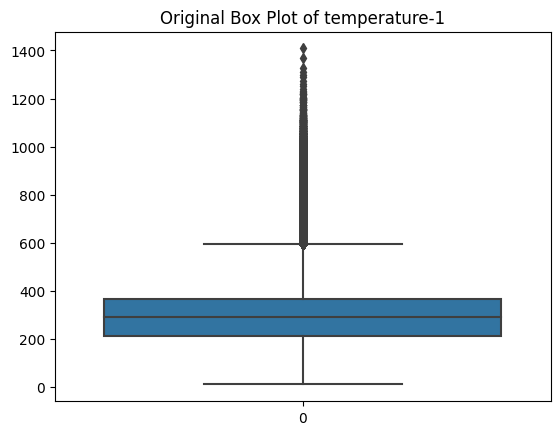

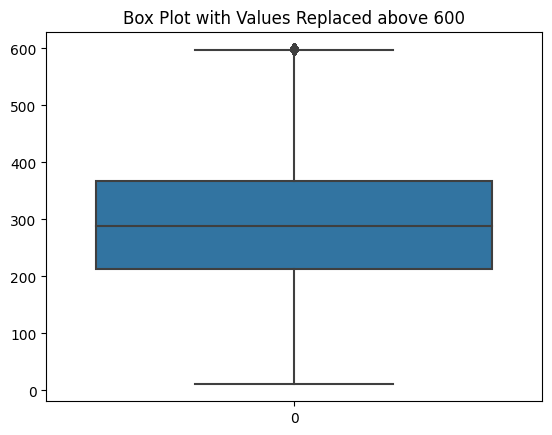

In [22]:
threshold_value = 600
train_features = replace_values_above_threshold(data_test, 'temperature-1', threshold_value)

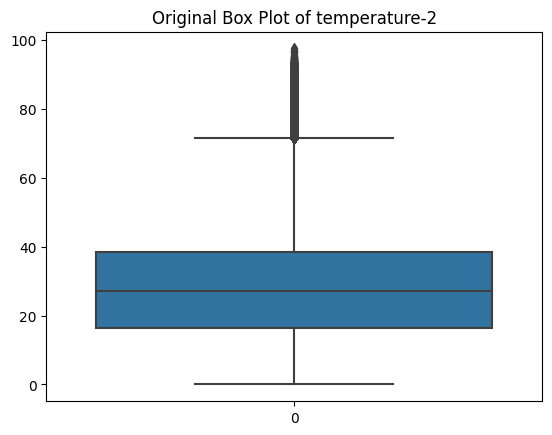

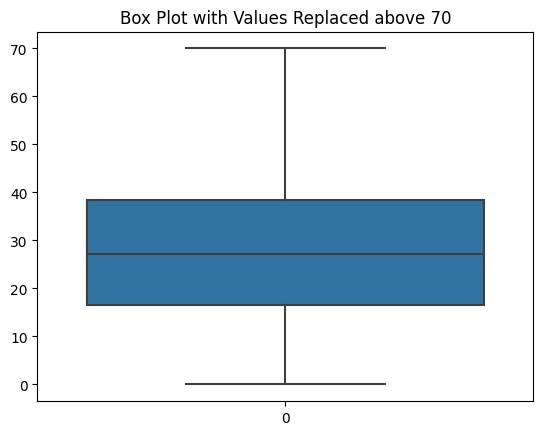

In [23]:
threshold_value = 70
train_features = replace_values_above_threshold(data_test, 'temperature-2', threshold_value)

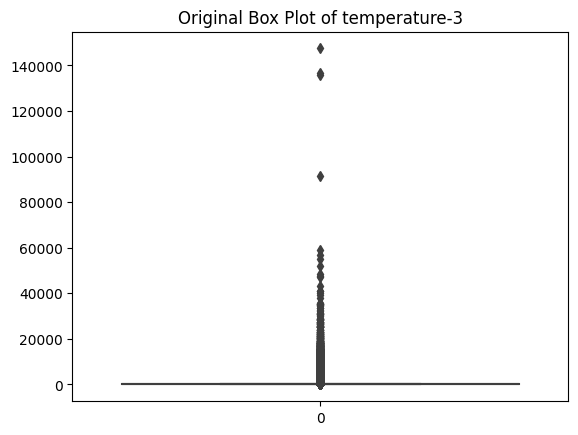

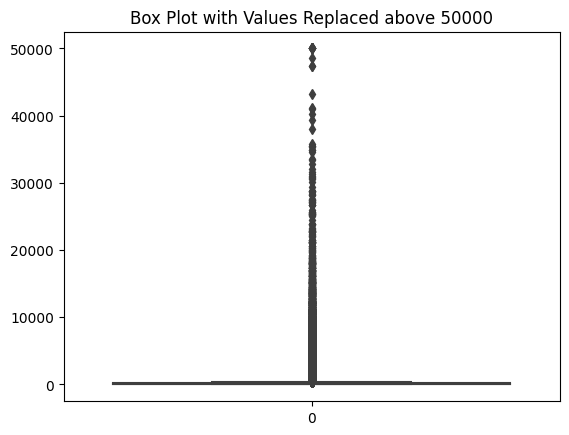

In [24]:
threshold_value = 50000
train_features = replace_values_above_threshold(data_test, 'temperature-3', threshold_value)

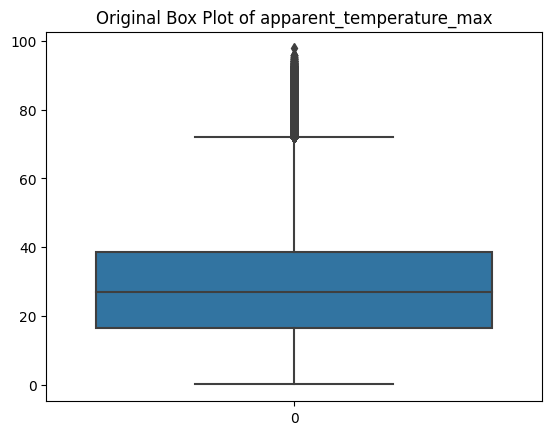

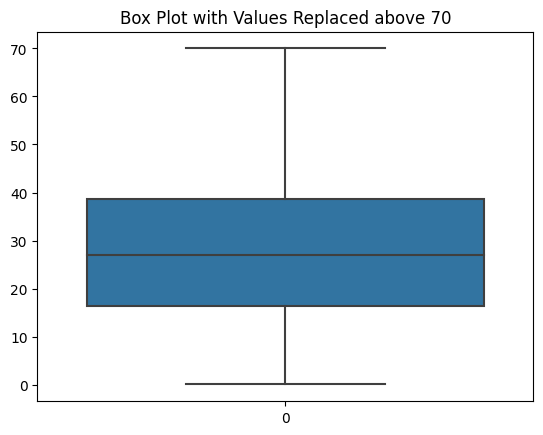

In [25]:
threshold_value = 70
train_features = replace_values_above_threshold(data_test, 'apparent_temperature_max', threshold_value)

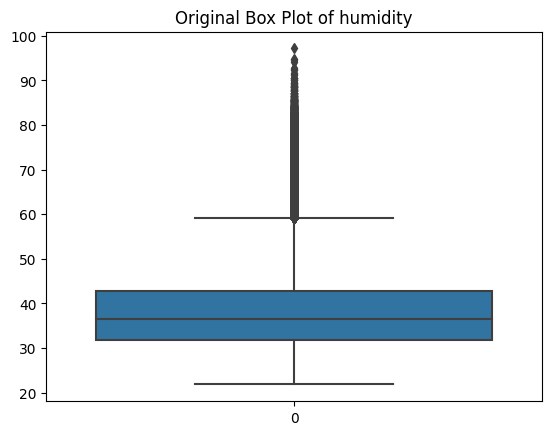

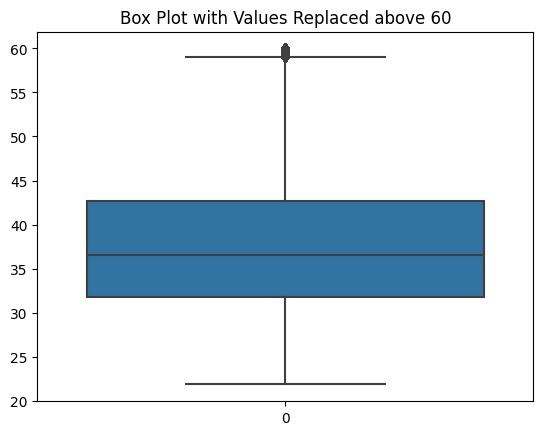

In [26]:
threshold_value = 60
train_features = replace_values_above_threshold(data_test, 'humidity', threshold_value)

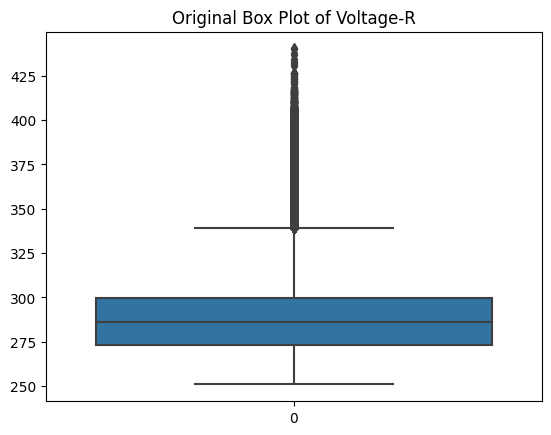

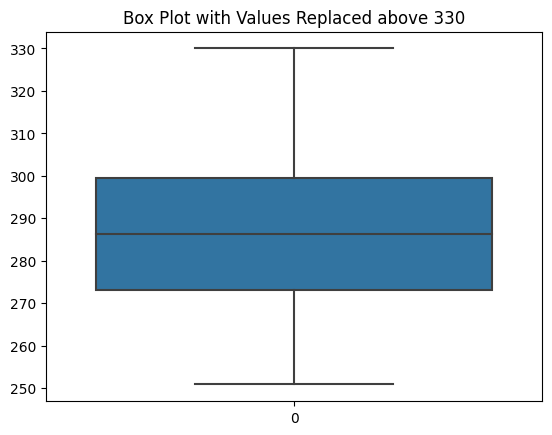

In [27]:
threshold_value = 330
train_features = replace_values_above_threshold(data_test, 'Voltage-R', threshold_value)

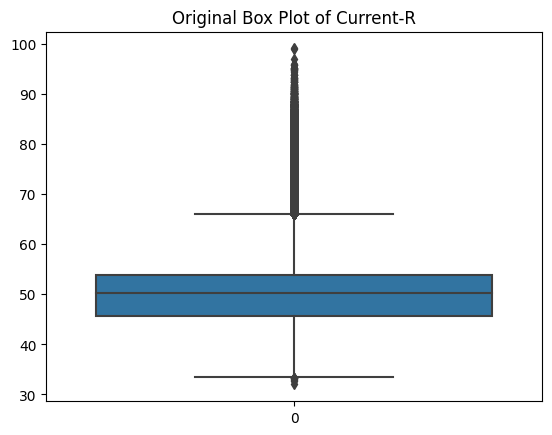

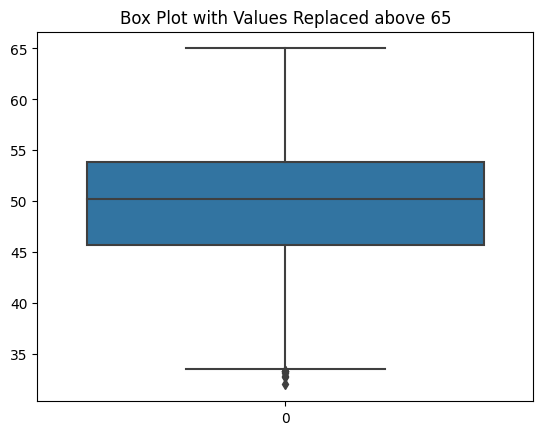

In [28]:
threshold_value = 65
train_features = replace_values_above_threshold(data_test, 'Current-R', threshold_value)

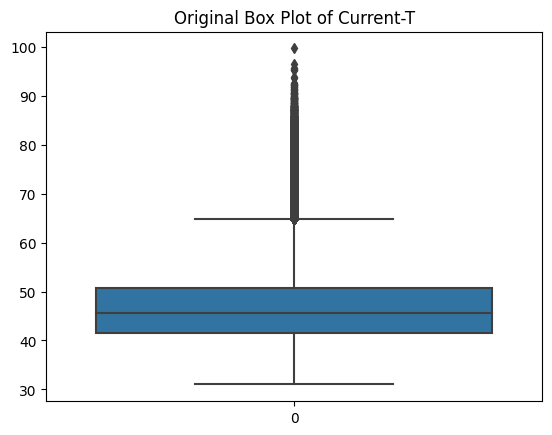

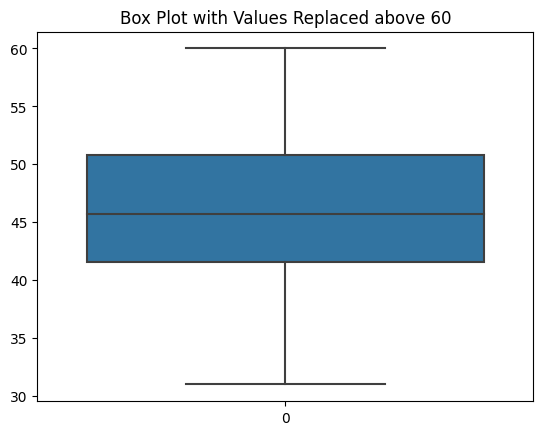

In [29]:
threshold_value = 60
train_features = replace_values_above_threshold(data_test, 'Current-T', threshold_value)

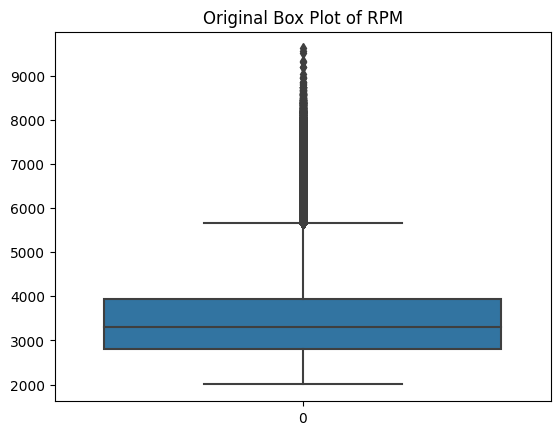

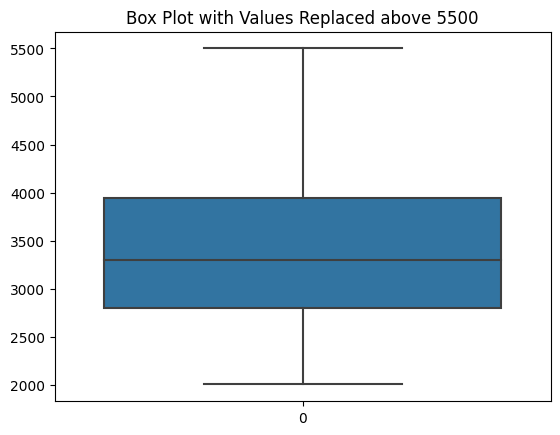

In [30]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_test, 'RPM', threshold_value)

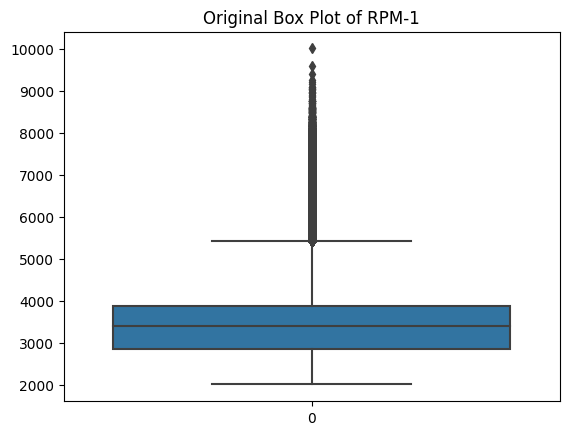

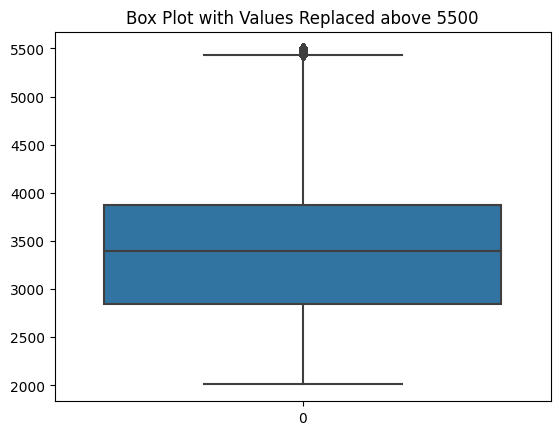

In [31]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_test, 'RPM-1', threshold_value)

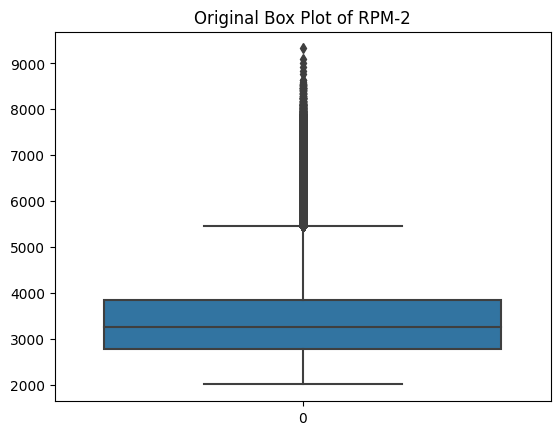

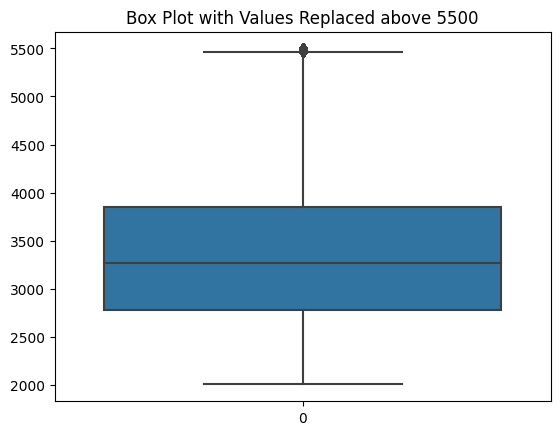

In [32]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_test, 'RPM-2', threshold_value)

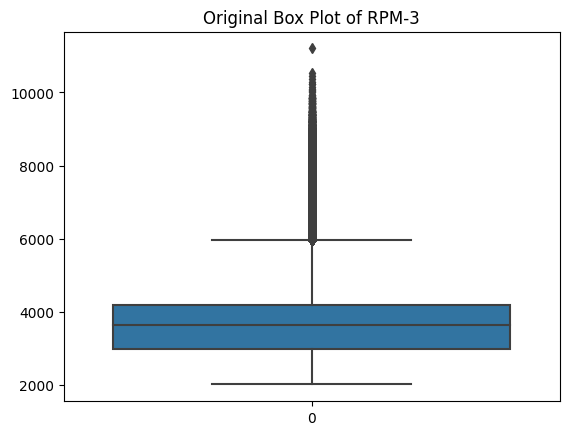

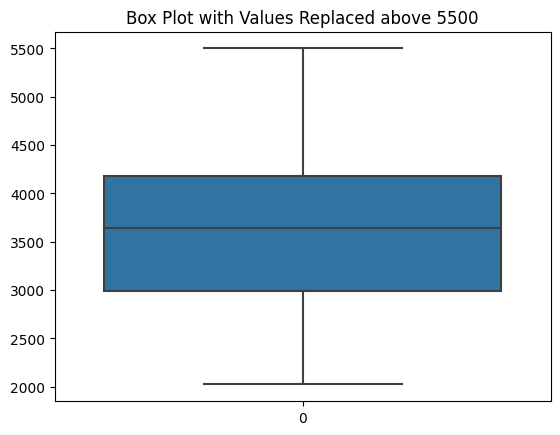

In [33]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_test, 'RPM-3', threshold_value)

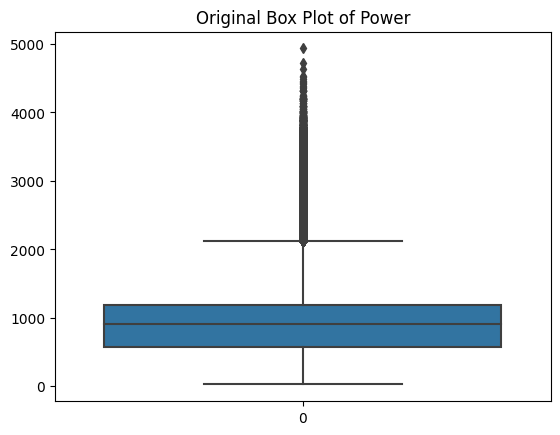

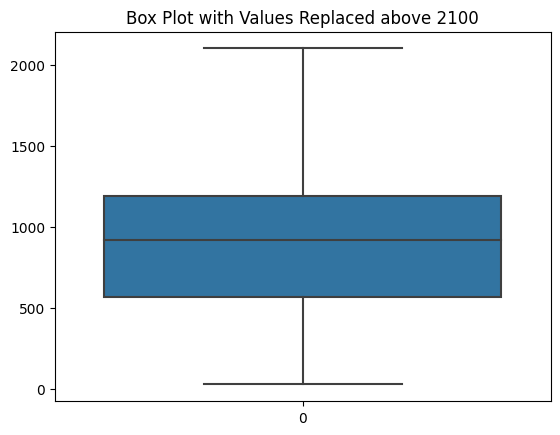

In [34]:
threshold_value = 2100
train_features = replace_values_above_threshold(data_test, 'Power', threshold_value)

In [35]:
def replace_values_above_threshold(data_test, column, threshold):
    sns.boxplot(data_test[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    above_threshold = data_test[column] < threshold
    data_test.loc[above_threshold, column] = threshold

    sns.boxplot(data_test[column])
    plt.title(f'Box Plot with Values Replaced above {threshold}')
    plt.show()

    return data_test

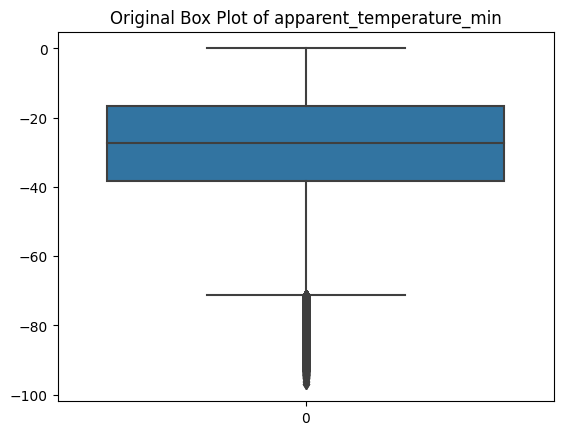

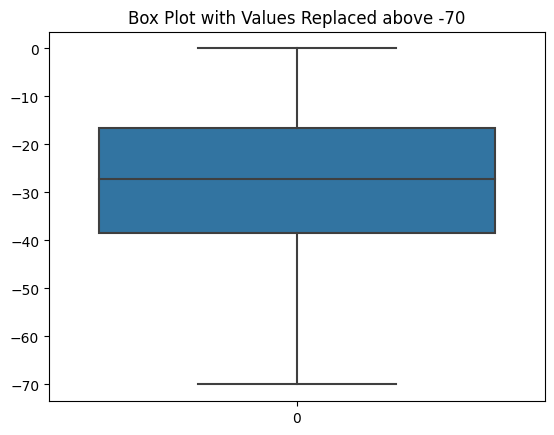

In [36]:
threshold_value = -70
train_features = replace_values_above_threshold(data_test, 'apparent_temperature_min', threshold_value)

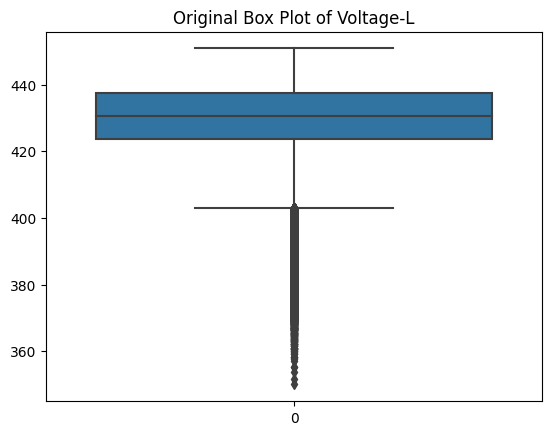

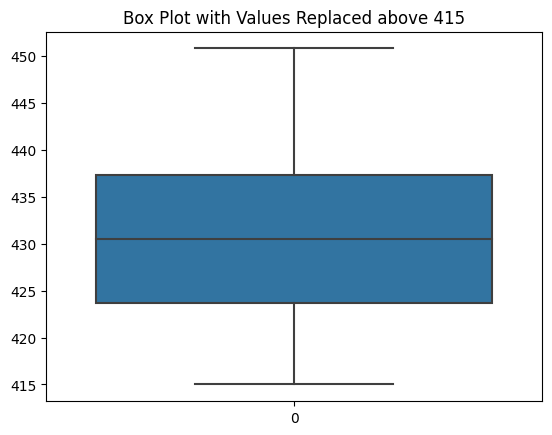

In [37]:
threshold_value = 415
train_features = replace_values_above_threshold(data_test, 'Voltage-L', threshold_value)

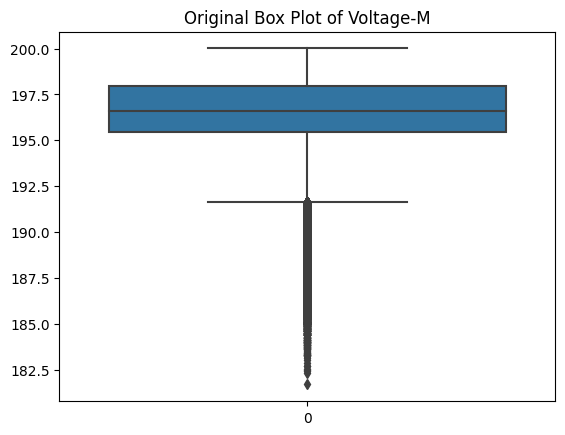

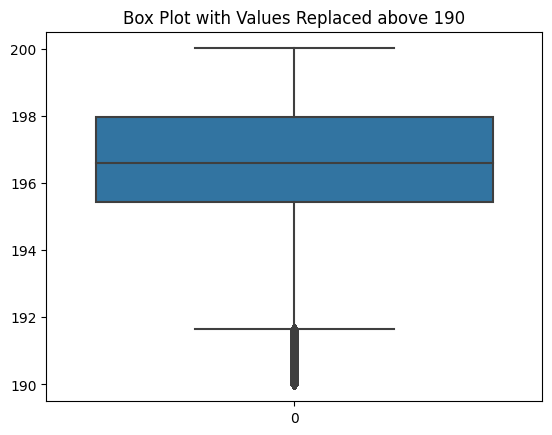

In [38]:
threshold_value = 190
train_features = replace_values_above_threshold(data_test, 'Voltage-M', threshold_value)

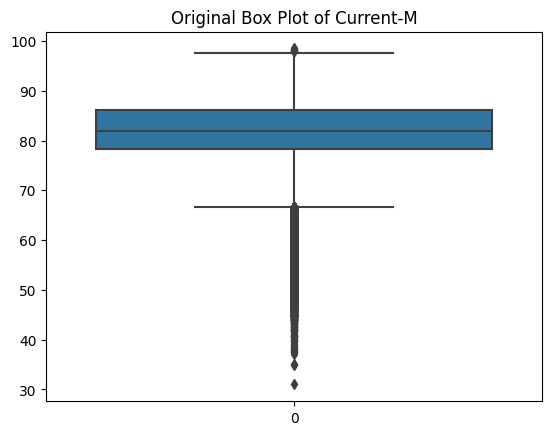

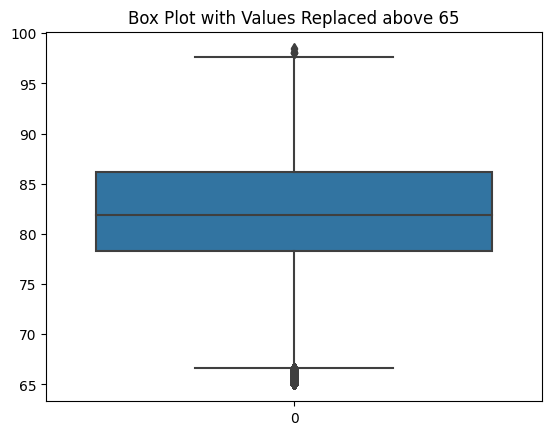

In [39]:
threshold_value = 65
train_features = replace_values_above_threshold(data_test, 'Current-M', threshold_value)

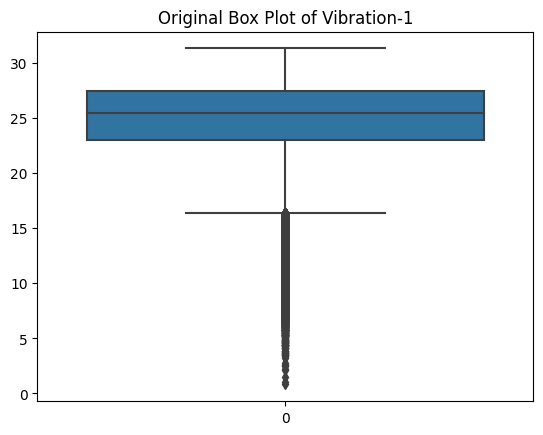

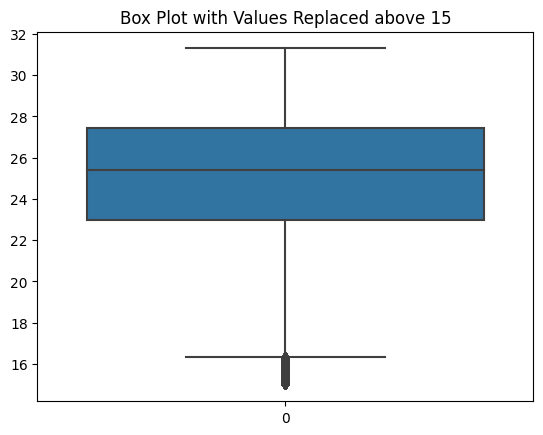

In [40]:
threshold_value = 15
train_features = replace_values_above_threshold(data_test, 'Vibration-1', threshold_value)

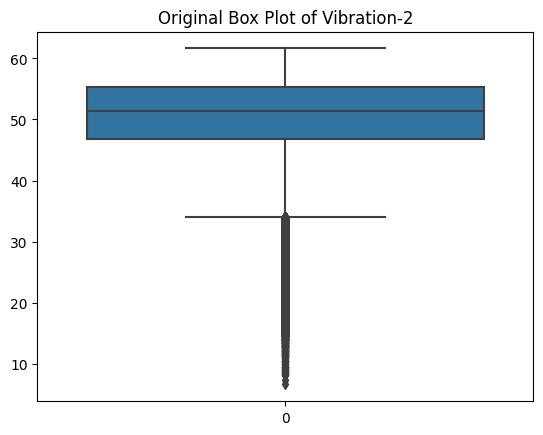

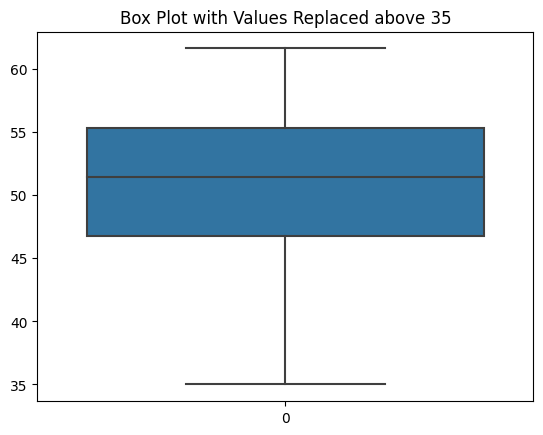

In [41]:
threshold_value = 35
train_features = replace_values_above_threshold(data_test, 'Vibration-2', threshold_value)

In [42]:
def replace_values_above_threshold(data_test, column, threshold):
    sns.boxplot(data_test[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    above_threshold = data_test[column] > threshold
    data_test.loc[above_threshold, column] = threshold

    sns.boxplot(data_test[column])
    plt.title(f'Box Plot with Values Replaced above {threshold}')
    plt.show()

    return data_test

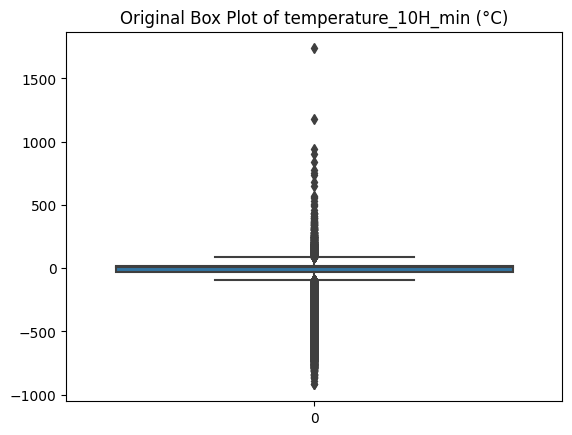

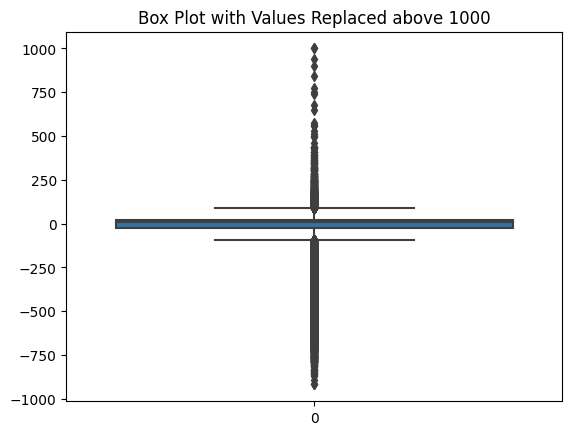

In [43]:
threshold_value = 1000
train_features = replace_values_above_threshold(data_test, 'temperature_10H_min (°C)', threshold_value)

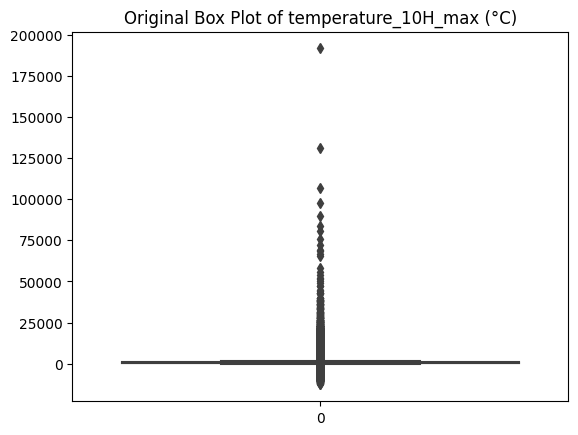

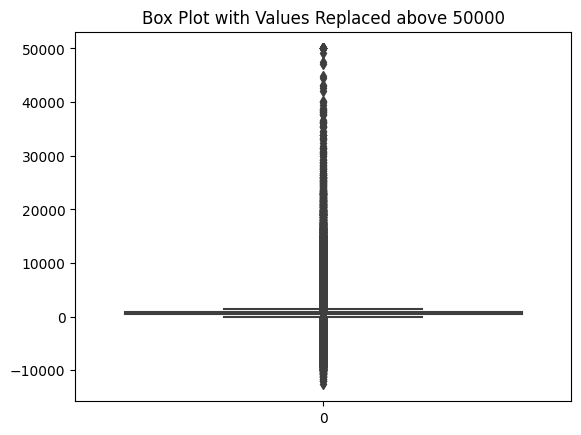

In [44]:
threshold_value = 50000
train_features = replace_values_above_threshold(data_test, 'temperature_10H_max (°C)', threshold_value)

# FEATURE ENGINEERING

In [45]:
data_test.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,Vibration-1,Vibration-2,Power,Power_Backup,Priority,Area,Last Maintenance,Status Sparepart,Age,Country Machine
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,-3322.323689,-221.677374,166.922400,48.626853,166.131089,13.669606,-43.911657,2023-01-14 10:51:00,33.920209,...,26.944341,57.225787,1087.088945,Yes,High,MKS,2020-10-11,In Use,16.0,KR
1,TRX8fc5889e25fbf66b21063d165228745f,719.700365,-22.696733,400.678538,14.421425,53.740342,22.297932,-36.569152,2024-01-10 14:02:00,38.730079,...,23.513569,55.341528,944.909574,Yes,Medium,BDG,2020-02-23,Repair,19.0,CN
2,TRX5c56664724a974cf6c87bd2659fd7046,718.918630,23.645588,456.535206,39.053999,16.800056,24.194078,-19.180181,2024-03-04 12:41:00,32.308273,...,19.985905,44.386573,1524.919220,Yes,Medium,MKS,2021-01-02,In Use,17.0,CN
3,TRX85fe42a5737897b7649a24fede27e90f,593.678709,19.380103,300.119375,7.974228,118.629967,14.245905,-28.569977,2024-11-20 06:47:00,28.081321,...,21.777423,50.735681,469.725303,Yes,Medium,BPN,2020-12-21,In Use,10.0,CN
4,TRX16fae83f3c8c66fb15f088e7da7713ee,644.119485,27.352616,600.000000,56.588644,5.298174,31.684072,-24.182661,2024-03-17 01:39:00,33.968450,...,27.061249,52.317770,1325.416708,No,High,MLG,2021-03-08,In Use,13.0,CN


In [46]:
data_test.describe()

,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,humidity,Voltage-L,Voltage-R,...,Current-R,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Age
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,6.647964e+02,-2.469574e+01,2.985228e+02,2.851236e+01,1.664462e+02,2.852041e+01,-2.850669e+01,3.795972e+01,4.300879e+02,2.880865e+02,...,5.033877e+01,4.662368e+01,3.446963e+03,3.451366e+03,3.389184e+03,3.676635e+03,2.486644e+01,5.042732e+01,9.358998e+02,1.016068e+01
std,6.437266e+02,8.566446e+01,1.155177e+02,1.554595e+01,3.308843e+02,1.564537e+01,1.552487e+01,7.835345e+00,8.724930e+00,1.859978e+01,...,6.165087e+00,6.348795e+00,8.003089e+02,7.687687e+02,7.708697e+02,8.464347e+02,3.229230e+00,6.036234e+00,4.634259e+02,5.343540e+00
min,-1.264606e+04,-9.187688e+02,1.047542e+01,2.691443e-03,1.798599e-05,1.112303e-02,-7.000000e+01,2.182498e+01,4.150000e+02,2.508710e+02,...,3.198040e+01,3.099800e+01,2.000888e+03,2.009302e+03,2.000888e+03,2.023073e+03,1.500000e+01,3.500000e+01,2.566150e+01,1.000000e+00
25%,4.705099e+02,-2.652372e+01,2.138186e+02,1.645727e+01,3.413863e+01,1.633853e+01,-3.838868e+01,3.174980e+01,4.236706e+02,2.730427e+02,...,4.568952e+01,4.153637e+01,2.799602e+03,2.841554e+03,2.771367e+03,2.990172e+03,2.297997e+01,4.676308e+01,5.686889e+02,6.000000e+00
50%,5.998002e+02,1.151091e+01,2.891368e+02,2.716354e+01,9.345783e+01,2.689002e+01,-2.721943e+01,3.653791e+01,4.305219e+02,2.863606e+02,...,5.021165e+01,4.568305e+01,3.292034e+03,3.392028e+03,3.261166e+03,3.646309e+03,2.540909e+01,5.141374e+01,9.157686e+02,1.015643e+01
75%,8.251014e+02,1.936306e+01,3.669977e+02,3.843143e+01,1.691943e+02,3.863104e+01,-1.648652e+01,4.267454e+01,4.373825e+02,2.993884e+02,...,5.384597e+01,5.082624e+01,3.944301e+03,3.878042e+03,3.847598e+03,4.183856e+03,2.741512e+01,5.528891e+01,1.192037e+03,1.400000e+01
max,5.000000e+04,1.000000e+03,6.000000e+02,7.000000e+01,5.000000e+04,7.000000e+01,-4.494008e-03,6.000000e+01,4.508233e+02,3.300000e+02,...,6.500000e+01,6.000000e+01,5.500000e+03,5.500000e+03,5.500000e+03,5.500000e+03,3.129367e+01,6.162419e+01,2.100000e+03,2.000000e+01


## New Feature

- Kolom jam, hari, dan bulan dari timestamp
- Kolom jam, hari, dan bulan dari Last Maintenance
- Lama jarak bulan dari Last Maintenance ke sekarang

In [47]:
def analyze_timestamp(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month

In [48]:
analyze_timestamp(data_test)

<Axes: xlabel='hour', ylabel='Count'>

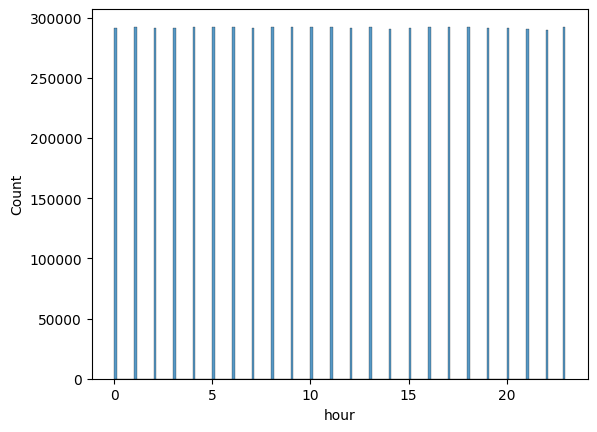

In [49]:
sns.histplot(data=data_test, x="hour")

<Axes: xlabel='day', ylabel='Count'>

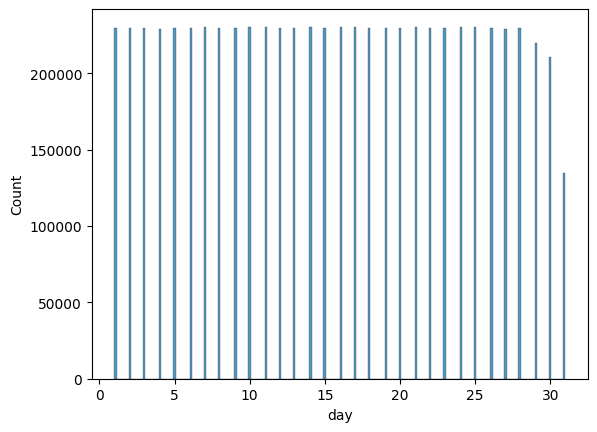

In [50]:
sns.histplot(data=data_test, x="day")

<Axes: xlabel='month', ylabel='Count'>

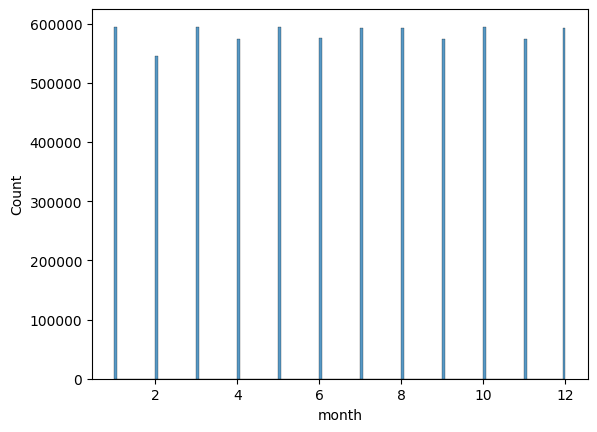

In [51]:
sns.histplot(data=data_test, x="month")

In [52]:
def last_maintenance(df):
    df['Last Maintenance'] = pd.to_datetime(df['Last Maintenance'])
    df['hour_maintenance'] = df['Last Maintenance'].dt.hour
    df['day_maintenance'] = df['Last Maintenance'].dt.day
    df['month_maintenance'] = df['Last Maintenance'].dt.month

In [53]:
last_maintenance(data_test)

In [54]:
def maintenance_distance(df):
    df['month_distance'] = (df['timestamp'].dt.year - df['Last Maintenance'].dt.year) * 12 + \
                           (df['timestamp'].dt.month - df['Last Maintenance'].dt.month)
    return df

In [55]:
data_test = maintenance_distance(data_test)

<Axes: xlabel='month_distance', ylabel='Count'>

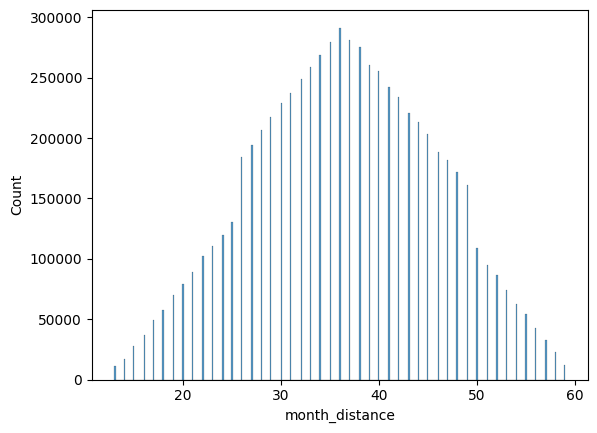

In [56]:
sns.histplot(data=data_test, x="month_distance")

#### Cek Kategori

In [57]:
data_test['Country Machine'].value_counts()

Country Machine
CN    2459313
KR    1356697
US    1269819
JP    1211984
TW     702187
Name: count, dtype: int64

In [58]:
data_test['Power_Backup'].value_counts()

Power_Backup
No     3747379
Yes    3252621
Name: count, dtype: int64

In [59]:
data_test['Priority'].value_counts()

Priority
Low       2967488
Medium    2273494
High      1759018
Name: count, dtype: int64

In [60]:
data_test['Area'].value_counts()

Area
JGJ     875972
BNTN    357661
BGR     329456
TGR     325732
BPN     325357
BKS     319212
SKBM    319166
PLKG    313911
MLG     309113
SRBY    308674
MKS     308321
BDG     307620
KRWG    302938
BFMG    298458
KLT     297666
SMGS    297644
KDR     291377
LMPG    287182
MKSR    266387
SRG     265482
BLJA    146912
SDA     145759
Name: count, dtype: int64

Saran penanganan
- Bagi jadi jawa/luar jawa
- Bagi Jabodetabek/bukan
- Area tidak digunakan karena sudah direpresentasikan kolom 'Priority'any

In [61]:
data_test['Status Sparepart'].value_counts()

Status Sparepart
Broken      2064423
On Check    1042107
In Use      1034566
Repair      1028126
Empty        953832
Ready        876946
Name: count, dtype: int64

## Bining

- Kolom apakah itu hari weekend/tidak
- Kolom apakah itu akhir bulan atau tidak
- Kolom kategori waktu apakah pagi, siang, atau malam
- Kolom bulan

In [62]:
# Mengkategorikan hari sebagai weekend atau bukan
def categorize_day(day):

    if day % 7 in [6, 0]:
        return 1  # Weekend
    else:
        return 0  # Bukan Weekend

In [63]:
data_test['weekend'] = data_test['day'].apply(categorize_day).astype(int)

In [64]:
def categorize_end_of_month(day):
    # Mengkategorikan hari sebagai akhir bulan
    if day == 31:
        return 1  # Akhir bulan
    else:
        return 0  # Bukan akhir bulan

In [65]:
data_test['end_month'] = data_test['day'].apply(categorize_end_of_month).astype(int)

In [66]:
# Mengkategorikan jam menjadi pagi, siang, malam
def categorize_hour(hour):
    if hour < 12:
        return '1' #Pagi
    elif hour < 18:
        return '2' #Siang
    else:
        return '3' #Malam

In [67]:
data_test['time_of_day'] = data_test['hour'].apply(categorize_hour).astype(int)

#### Drop Colum Not Use

In [68]:
data_test.columns

Index(['ID_Transaction', 'temperature_10H_max (°C)',
       'temperature_10H_min (°C)', 'temperature-1', 'temperature-2',
       'temperature-3', 'apparent_temperature_max', 'apparent_temperature_min',
       'timestamp', 'humidity', 'Voltage-L', 'Voltage-R', 'Voltage-M',
       'Current-M', 'Current-R', 'Current-T', 'RPM', 'RPM-1', 'RPM-2', 'RPM-3',
       'Vibration-1', 'Vibration-2', 'Power', 'Power_Backup', 'Priority',
       'Area', 'Last Maintenance', 'Status Sparepart', 'Age',
       'Country Machine', 'hour', 'day', 'month', 'hour_maintenance',
       'day_maintenance', 'month_maintenance', 'month_distance', 'weekend',
       'end_month', 'time_of_day'],
      dtype='object')

In [69]:
# test_new =data_test.drop(columns=['timestamp', 'Area',
#                                 'hour', 'day', 'Last Maintenance',
#                                 'month', 'hour_maintenance',
#                                 'day_maintenance', 'month_maintenance'])

In [70]:
test_new = data_test.copy()

## Encoding

#### Ordinal Encoding

In [71]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
order_priority = ['Low', 'Medium', 'High']
priority_encoder = OrdinalEncoder(categories=[order_priority])

# Melakukan encoding
test_new['Priority'] = priority_encoder.fit_transform(test_new[['Priority']])

In [73]:
test_new['Priority'] = test_new['Priority'].astype(int)

In [74]:
test_new['Priority'].value_counts()

Priority
0    2967488
1    2273494
2    1759018
Name: count, dtype: int64

#### Label Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
# Kolom yang akan di-label encoding
columns_to_encode = ['Power_Backup', 'Status Sparepart', 'Country Machine']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom yang ditentukan
for column in columns_to_encode:
    test_new[column] = label_encoder.fit_transform(test_new[column])

In [77]:
test_new.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,hour,day,month,hour_maintenance,day_maintenance,month_maintenance,month_distance,weekend,end_month,time_of_day
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,-3322.323689,-221.677374,166.922400,48.626853,166.131089,13.669606,-43.911657,2023-01-14 10:51:00,33.920209,...,10,14,1,0,11,10,27,1,0,1
1,TRX8fc5889e25fbf66b21063d165228745f,719.700365,-22.696733,400.678538,14.421425,53.740342,22.297932,-36.569152,2024-01-10 14:02:00,38.730079,...,14,10,1,0,23,2,47,0,0,2
2,TRX5c56664724a974cf6c87bd2659fd7046,718.918630,23.645588,456.535206,39.053999,16.800056,24.194078,-19.180181,2024-03-04 12:41:00,32.308273,...,12,4,3,0,2,1,38,0,0,2
3,TRX85fe42a5737897b7649a24fede27e90f,593.678709,19.380103,300.119375,7.974228,118.629967,14.245905,-28.569977,2024-11-20 06:47:00,28.081321,...,6,20,11,0,21,12,47,1,0,1
4,TRX16fae83f3c8c66fb15f088e7da7713ee,644.119485,27.352616,600.000000,56.588644,5.298174,31.684072,-24.182661,2024-03-17 01:39:00,33.968450,...,1,17,3,0,8,3,36,0,0,1


In [78]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 40 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   ID_Transaction            object        
 1   temperature_10H_max (°C)  float64       
 2   temperature_10H_min (°C)  float64       
 3   temperature-1             float64       
 4   temperature-2             float64       
 5   temperature-3             float64       
 6   apparent_temperature_max  float64       
 7   apparent_temperature_min  float64       
 8   timestamp                 datetime64[ns]
 9   humidity                  float64       
 10  Voltage-L                 float64       
 11  Voltage-R                 float64       
 12  Voltage-M                 float64       
 13  Current-M                 float64       
 14  Current-R                 float64       
 15  Current-T                 float64       
 16  RPM                       float64       
 17  RPM-1   

## Feature Extraction

In [79]:
test_new['average_temperature'] = test_new[['temperature_10H_max (°C)', 
                                                         'temperature_10H_min (°C)', 
                                                         'temperature-1', 
                                                         'temperature-2', 
                                                         'temperature-3']].mean(axis=1)

test_new['temperature_range'] = test_new['temperature_10H_max (°C)'] - test_new['temperature_10H_min (°C)']

test_new['average_voltage'] = test_new[['Voltage-L', 'Voltage-R', 'Voltage-M']].mean(axis=1)

test_new['average_current'] = test_new[['Current-M', 'Current-R', 'Current-T']].mean(axis=1)

test_new['average_RPM'] = test_new[['RPM', 'RPM-1', 'RPM-2', 'RPM-3']].mean(axis=1)

test_new['total_RPM'] = test_new[['RPM', 'RPM-1', 'RPM-2', 'RPM-3']].sum(axis=1)

test_new['average_vibration'] = test_new[['Vibration-1', 'Vibration-2']].mean(axis=1)

test_new['total_vibration'] = test_new[['Vibration-1', 'Vibration-2']].sum(axis=1)

In [80]:
# # Drop kolom yang tidak diperlukan
# columns_to_drop = ['temperature_10H_max (°C)', 'temperature_10H_min (°C)', 
#                    'temperature-1', 'temperature-2', 'temperature-3', 
#                    'Voltage-L', 'Voltage-R', 'Voltage-M', 
#                    'Current-M', 'Current-R', 'Current-T', 
#                    'RPM', 'RPM-1', 'RPM-2', 'RPM-3', 
#                    'Vibration-1', 'Vibration-2']

# test_new.drop(columns=columns_to_drop, inplace=True)

In [81]:
test_new.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,end_month,time_of_day,average_temperature,temperature_range,average_voltage,average_current,average_RPM,total_RPM,average_vibration,total_vibration
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,-3322.323689,-221.677374,166.922400,48.626853,166.131089,13.669606,-43.911657,2023-01-14 10:51:00,33.920209,...,0,1,-632.464144,-3100.646316,319.303972,55.163469,3463.711497,13854.845987,42.085064,84.170129
1,TRX8fc5889e25fbf66b21063d165228745f,719.700365,-22.696733,400.678538,14.421425,53.740342,22.297932,-36.569152,2024-01-10 14:02:00,38.730079,...,0,2,233.168787,742.397098,300.563673,57.102251,2782.404178,11129.616713,39.427549,78.855097
2,TRX5c56664724a974cf6c87bd2659fd7046,718.918630,23.645588,456.535206,39.053999,16.800056,24.194078,-19.180181,2024-03-04 12:41:00,32.308273,...,0,2,250.990696,695.273042,305.189807,61.854076,3769.035896,15076.143583,32.186239,64.372477
3,TRX85fe42a5737897b7649a24fede27e90f,593.678709,19.380103,300.119375,7.974228,118.629967,14.245905,-28.569977,2024-11-20 06:47:00,28.081321,...,0,1,207.956476,574.298606,312.008196,59.110460,3014.720483,12058.881931,36.256552,72.513104
4,TRX16fae83f3c8c66fb15f088e7da7713ee,644.119485,27.352616,600.000000,56.588644,5.298174,31.684072,-24.182661,2024-03-17 01:39:00,33.968450,...,0,1,266.671784,616.766869,291.723588,62.732743,3988.719091,15954.876363,39.689510,79.379020


In [82]:
test_new.columns

Index(['ID_Transaction', 'temperature_10H_max (°C)',
       'temperature_10H_min (°C)', 'temperature-1', 'temperature-2',
       'temperature-3', 'apparent_temperature_max', 'apparent_temperature_min',
       'timestamp', 'humidity', 'Voltage-L', 'Voltage-R', 'Voltage-M',
       'Current-M', 'Current-R', 'Current-T', 'RPM', 'RPM-1', 'RPM-2', 'RPM-3',
       'Vibration-1', 'Vibration-2', 'Power', 'Power_Backup', 'Priority',
       'Area', 'Last Maintenance', 'Status Sparepart', 'Age',
       'Country Machine', 'hour', 'day', 'month', 'hour_maintenance',
       'day_maintenance', 'month_maintenance', 'month_distance', 'weekend',
       'end_month', 'time_of_day', 'average_temperature', 'temperature_range',
       'average_voltage', 'average_current', 'average_RPM', 'total_RPM',
       'average_vibration', 'total_vibration'],
      dtype='object')

In [83]:
test_new.to_csv('/kaggle/working/test_cleaned.csv', index=False)